In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [63]:
y1=np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) #for vertical edge detection
y2=np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) #for horizantal edge detection
y3=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])#Edge Detection
y4=np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]) #for blur the image

In [66]:
print("Vertical Edges: ==========================================")
print(y1)
print("Horizontal Edges: ========================================")
print(y2)
print("Complete Edge Detection: =================================")
print(y3)
print("Image Blur: ==============================================")
print(y4)
print()

Vertical Edges: ==========================================
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Horizontal Edges: ========================================
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
Complete Edge Detection: =================================
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
Image Blur: ==============================================
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]



In [6]:
def multp_sum(arr,ker):
    s=0
    for i in range(len(arr)):
        for j in range(len(arr)):
            s=s+arr[i][j]*ker[i][j]
    return s
   

In [7]:
def conv(img,ker):
    ls=[]
    z=[]
    for i in range(len(img)-3+1):
        z=[]
        for j in range(len(img)-3+1):
            arr=img[i:i+3,j:j+3]
            s=multp_sum(arr,ker)
            z.append(s)
        ls.append(z)
    return(np.array(ls))
            

In [8]:
def Relu(img):
    ls=[]
    z=[]
    for i in range(len(img)):
        z=[]
        for j in range(len(img)):
            if img[i][j]>0:
                z.append(img[i][j])
            else:
                z.append(0)
        ls.append(z)
    return np.array(ls)

In [9]:
def sigmoid_inner(x):
    return(1/(1+np.exp(-x)))

def sigmoid(img):
    ls=[]
    z=[]
    for i in range(len(img)):
        z=[]
        for j in range(len(img)):
            z.append(sigmoid_inner(img[i][j]))
        ls.append(z)
    return np.array(ls)
    

In [12]:
def gaus(img):
    ls=[]
    z=[]
    for i in range(len(img)):
        z=[]
        for j in range(len(img)):
            z.append(np.exp((img[i][j])**2))
        ls.append(z)
    return np.array(ls)

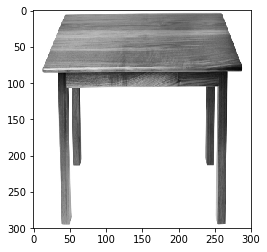

In [71]:
img=cv2.imread("table.jpg",cv2.IMREAD_GRAYSCALE)
img=cv2.resize(img,(300,300))
plt.imshow(img,cmap="gray")


<h2>Applying ReLu Activation Function</h2>

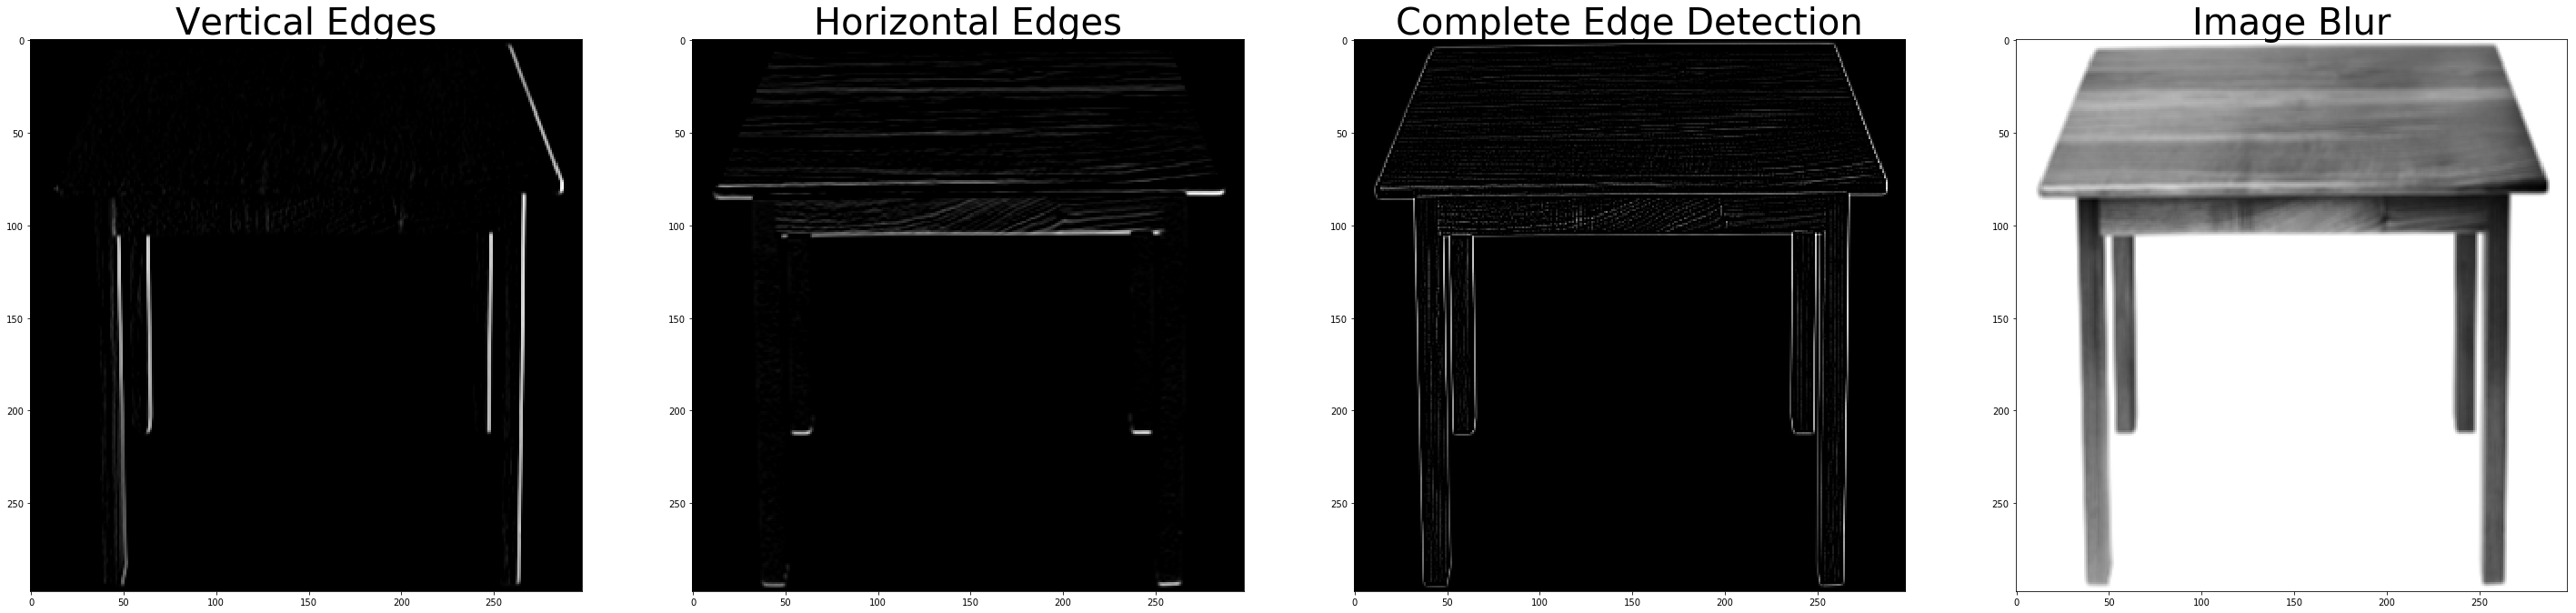

In [86]:
ker=[y1,y2,y3,y4]
fig=plt.figure(figsize=(50,50 ))
title=['Vertical Edges','Horizontal Edges','Complete Edge Detection','Image Blur']
for i in range(1,5):
    fig.add_subplot(1, 4, i)
    im=conv(img,ker[i-1])
    im=Relu(im)
    plt.imshow(im,cmap="gray")
    plt.title(title[i-1],fontsize=40)
plt.show()

<h2>Applying Sigmoid Activation Function</h2>

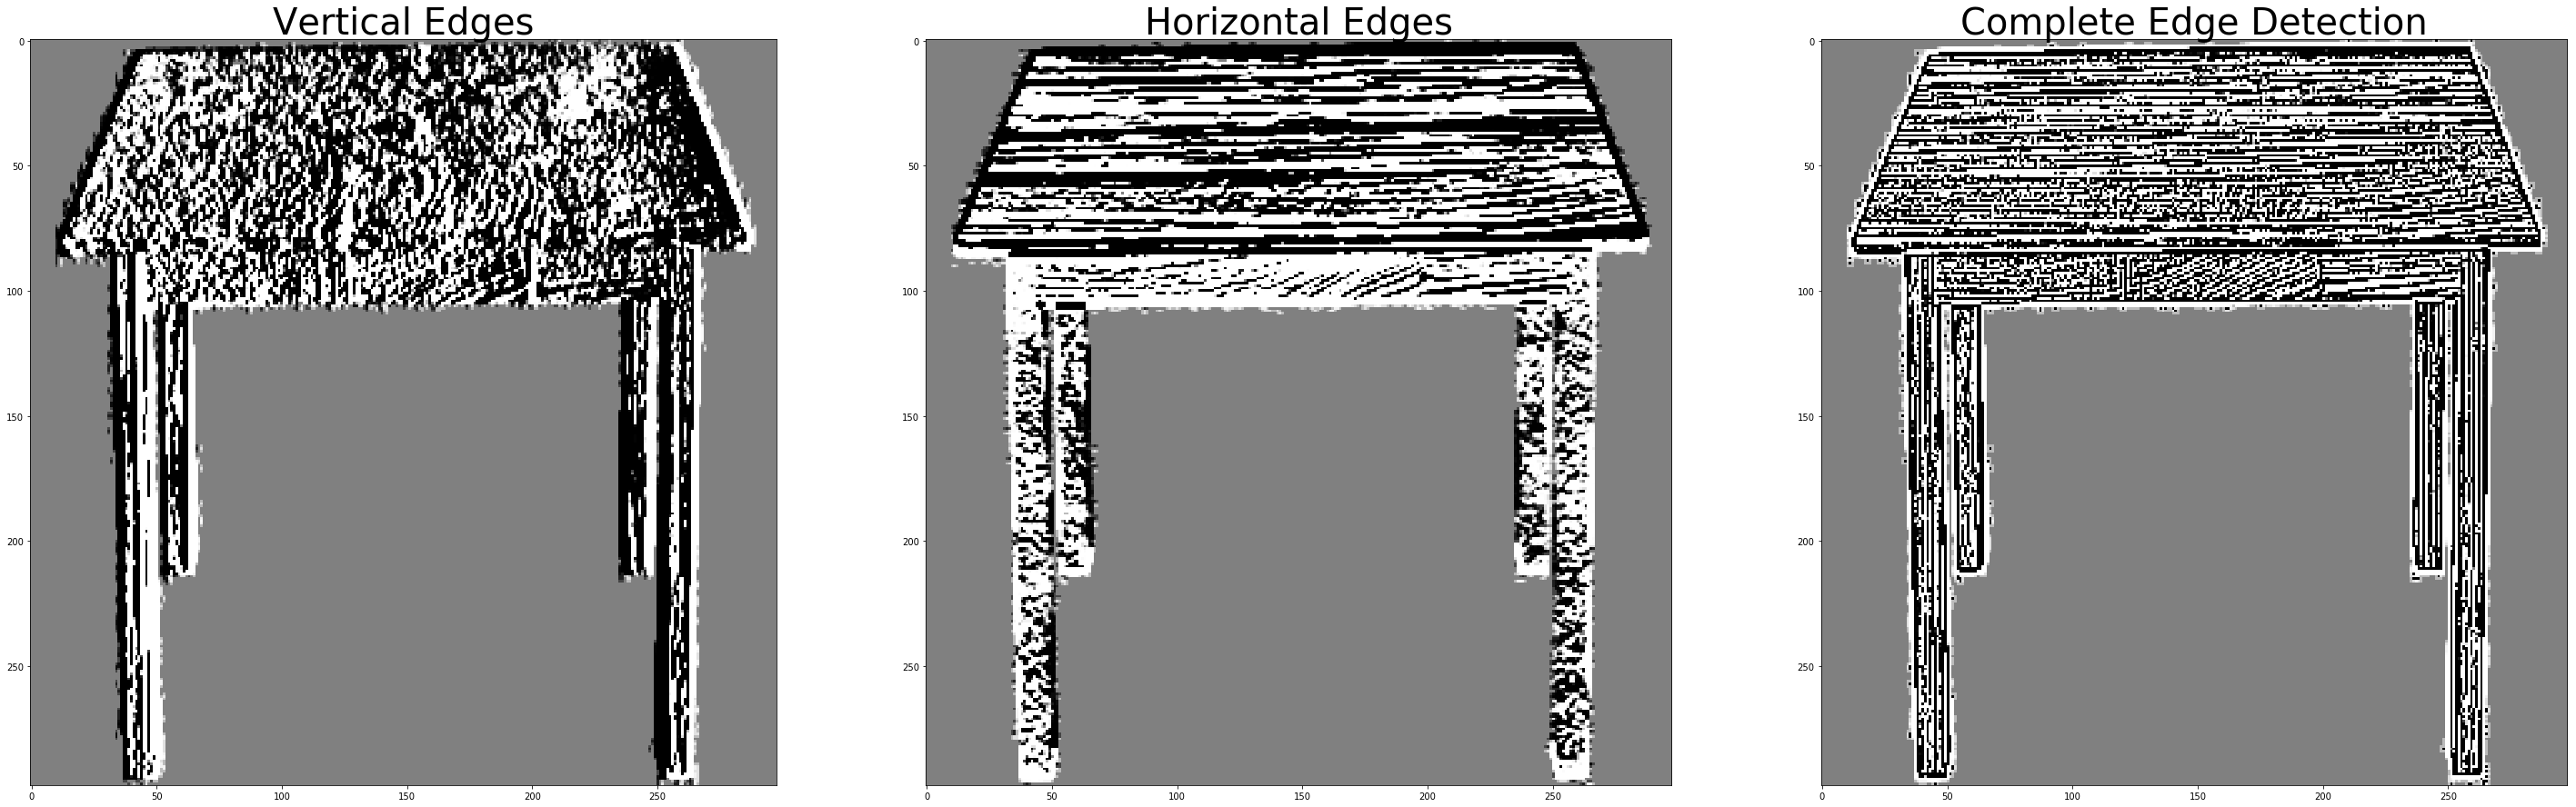

In [87]:
ker=[y1,y2,y3,y4]
fig=plt.figure(figsize=(50,50 ))
title=['Vertical Edges','Horizontal Edges','Complete Edge Detection']
for i in range(1,4):
    fig.add_subplot(1, 3, i)
    im=conv(img,ker[i-1])
    im=sigmoid(im)
    plt.imshow(im,cmap="gray")
    plt.title(title[i-1],fontsize=40)
plt.show()

<h2>Applying Guassian Activation Function</h2>

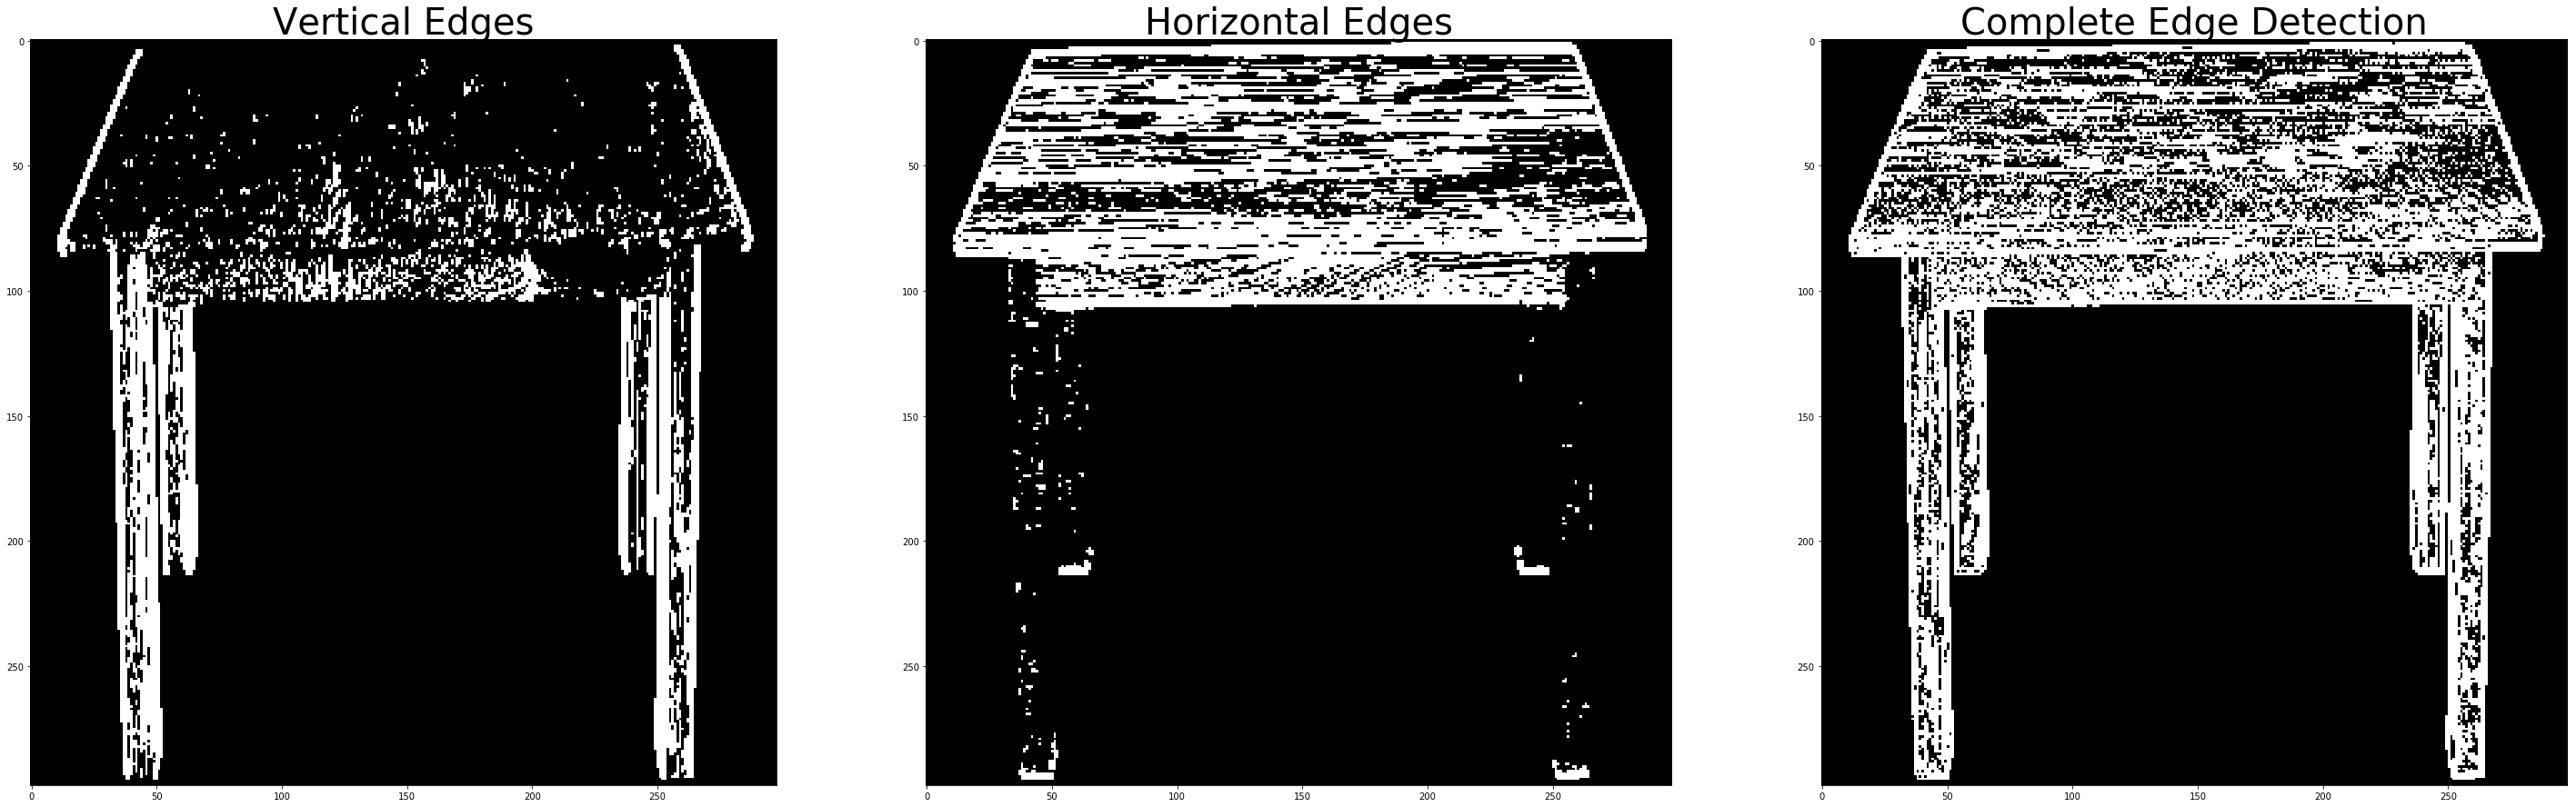

In [88]:
ker=[y1,y2,y3,y4]
fig=plt.figure(figsize=(50,50 ))
title=['Vertical Edges','Horizontal Edges','Complete Edge Detection']
for i in range(1,4):
    fig.add_subplot(1, 3, i)
    im=conv(img,ker[i-1])
    im=gaus(im)
    plt.imshow(im,cmap="gray")
    plt.title(title[i-1],fontsize=40)
plt.show()